In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df = pd.read_csv(r"C:\Users\samyu\OneDrive\Desktop\Mini Project\Mini Project\heart_2020\heart_2020_cleaned.csv") 
df = df.dropna()



In [2]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


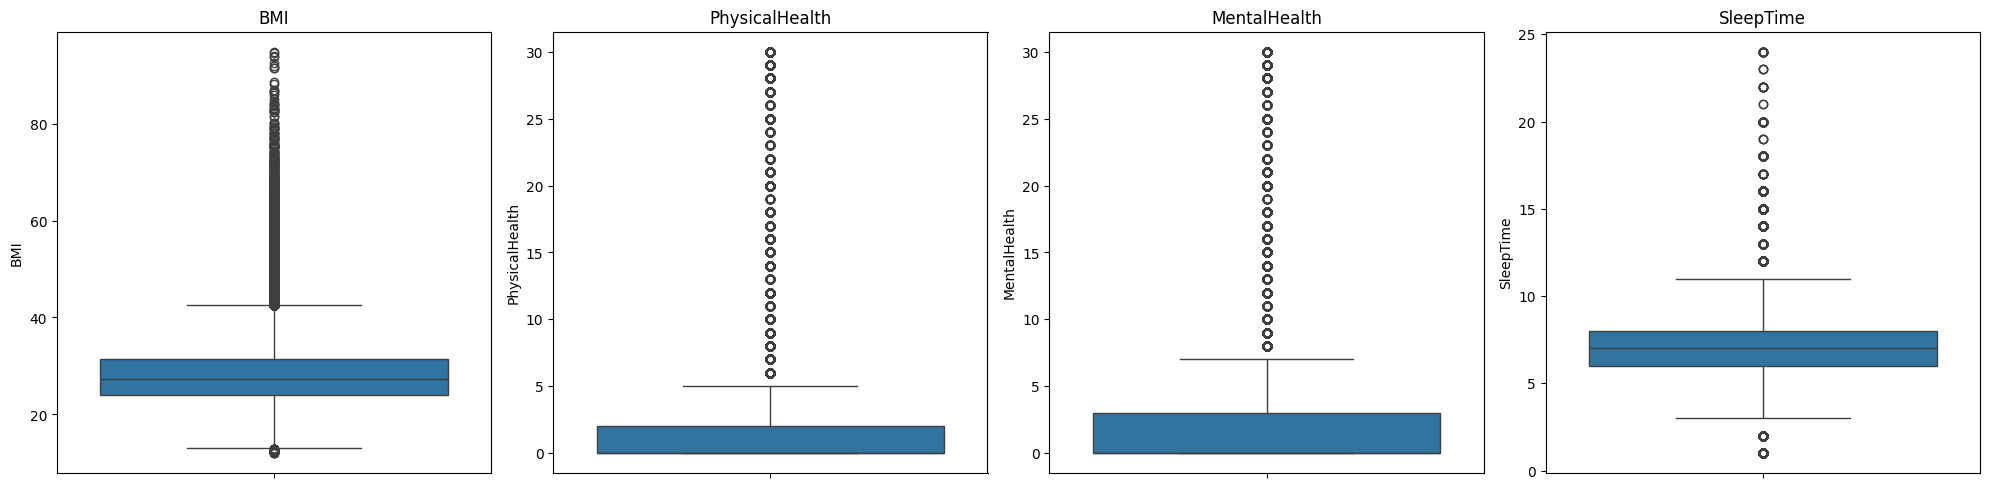

In [6]:
import seaborn as sns
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# Create subplots
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(5*num_features, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


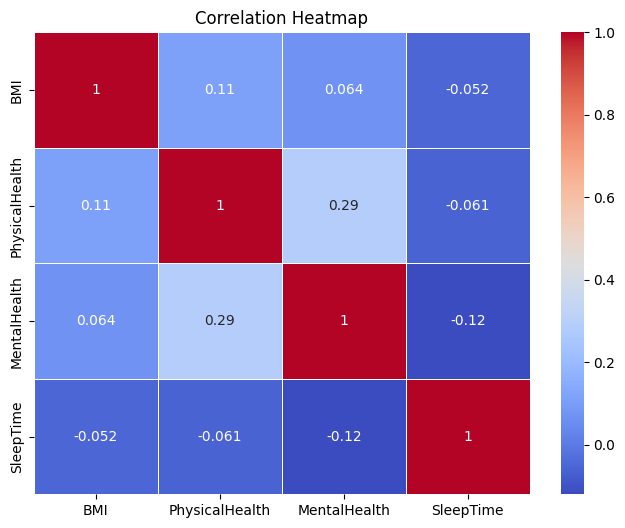

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [8]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical
label_encoders = {}
onehot_encoder = OneHotEncoder(sparse_output=False, drop="first")


for col in cat_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else: 
        encoded_cols = onehot_encoder.fit_transform(df[[col]])
        df = df.drop(col, axis=1)
        df = pd.concat([df, pd.DataFrame(encoded_cols, columns=[f"{col}_{i}" for i in range(encoded_cols.shape[1])])], axis=1)




In [9]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_0', 'AgeCategory_1', 'AgeCategory_2',
       'AgeCategory_3', 'AgeCategory_4', 'AgeCategory_5', 'AgeCategory_6',
       'AgeCategory_7', 'AgeCategory_8', 'AgeCategory_9', 'AgeCategory_10',
       'AgeCategory_11', 'Race_0', 'Race_1', 'Race_2', 'Race_3', 'Race_4',
       'Diabetic_0', 'Diabetic_1', 'Diabetic_2', 'GenHealth_0', 'GenHealth_1',
       'GenHealth_2', 'GenHealth_3'],
      dtype='object')

In [10]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_2,Race_3,Race_4,Diabetic_0,Diabetic_1,Diabetic_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_2,Race_3,Race_4,Diabetic_0,Diabetic_1,Diabetic_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.775362,...,0.085824,0.034172,0.766779,0.021204,0.127588,0.008002,0.108435,0.291215,0.035301,0.356034
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.417344,...,0.280104,0.181671,0.422883,0.144065,0.333631,0.089095,0.310930,0.454323,0.184539,0.478826
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(df.head(5))


   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  PhysicalActivity  ...  Race_2  Race_3  \
0          30.0            0    0                 1  ...     0.0     0.0   
1           0.0            0    0                 1  ...     0.0     0.0   
2          30.0            0    1                 1  ...     0.0     0.0   
3           0.0            0    0                 0  ...     0.0     0.0   
4           0.0            1    0                 1  ...     0.0     0.0   

   Race_4  Diabetic_0  Diabetic_1  Diabetic_2  GenHealth_0  GenHealth_1  \
0     1.0  

In [13]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

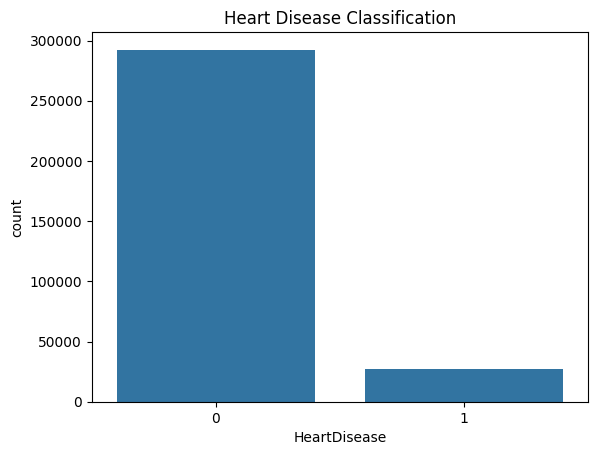

In [14]:
import seaborn as sns
sns.countplot(x=df['HeartDisease'])
plt.title("Heart Disease Classification")
plt.show()

In [15]:
X_scaled

array([[0.05529398, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.1004467 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.17578172, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14753109, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.25099602, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.41699867, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959





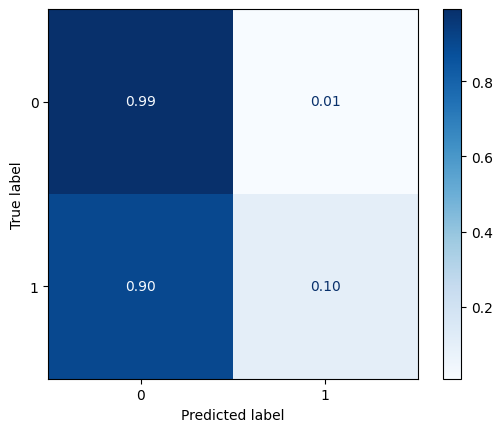

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.34      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959





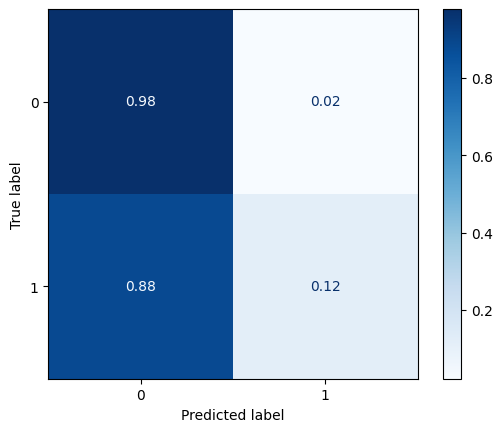

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58367
           1       0.23      0.25      0.24      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.86      0.86     63959





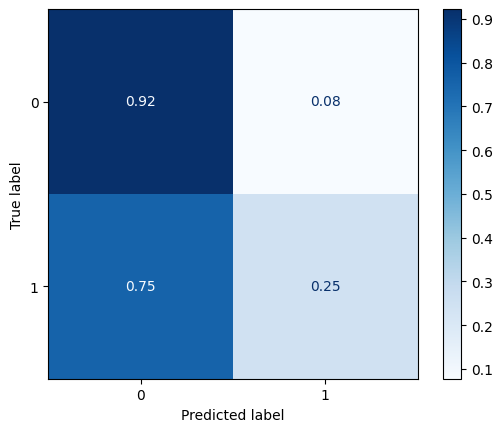

C:\Users\samyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959





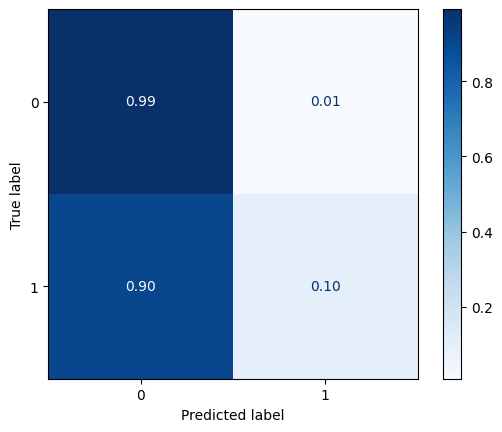

C:\Users\samyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.48      0.11      0.18      5592

    accuracy                           0.91     63959
   macro avg       0.70      0.55      0.56     63959
weighted avg       0.88      0.91      0.89     63959





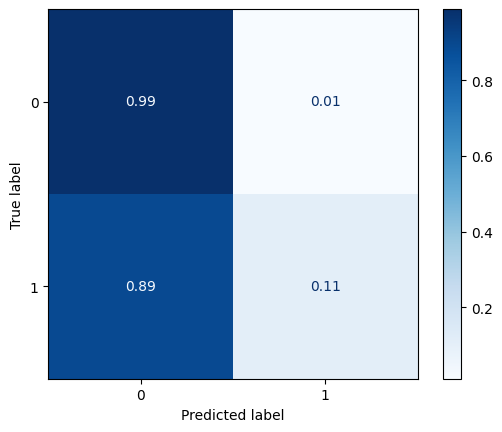

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.913867   0.539789  0.100680  0.169706  0.836488
Random Forest        0.902985   0.341929  0.118562  0.176072  0.784516
Decision Tree        0.862928   0.231705  0.245172  0.238248  0.584403
XGBoost              0.913491   0.528338  0.098355  0.165837  0.833212
MLP Classifier       0.911709   0.478192  0.107833  0.175981  0.826776


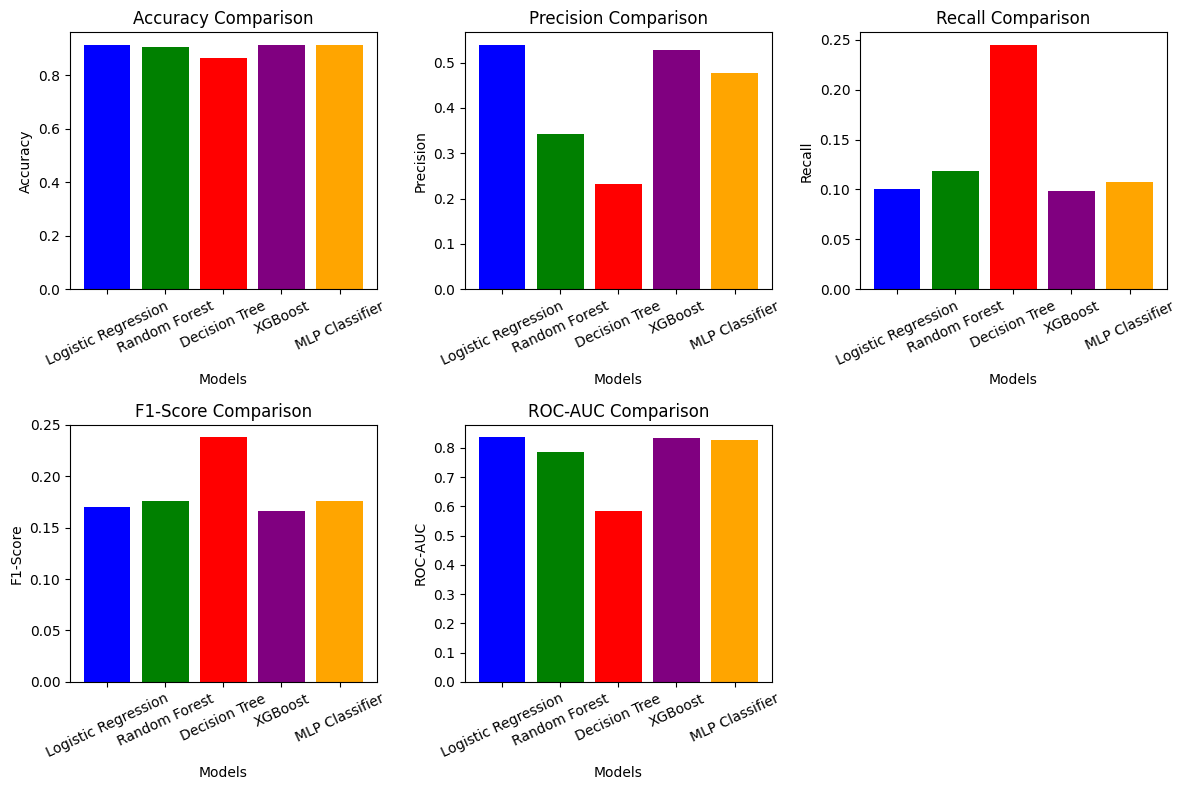

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = [accuracy, precision, recall, f1, roc_auc]

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


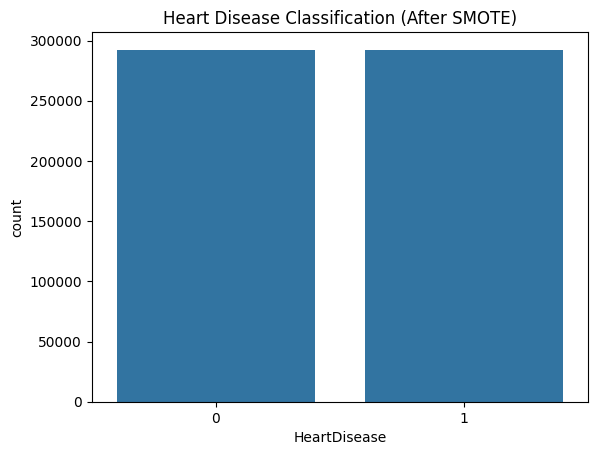

In [17]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

df_resampled = pd.DataFrame(y_resampled, columns=['HeartDisease'])

sns.countplot(x=df_resampled['HeartDisease'])
plt.title("Heart Disease Classification (After SMOTE)")
plt.show()


Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76     58485
           1       0.75      0.78      0.77     58484

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969





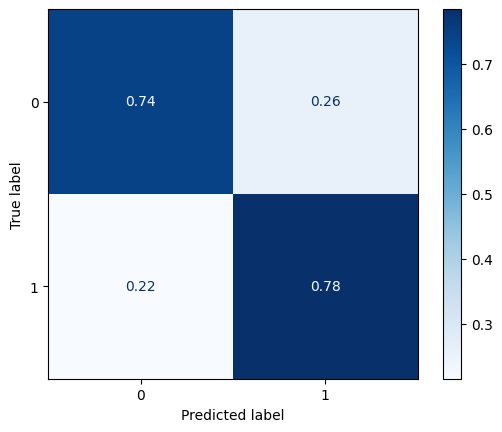

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     58485
           1       0.92      0.92      0.92     58484

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969





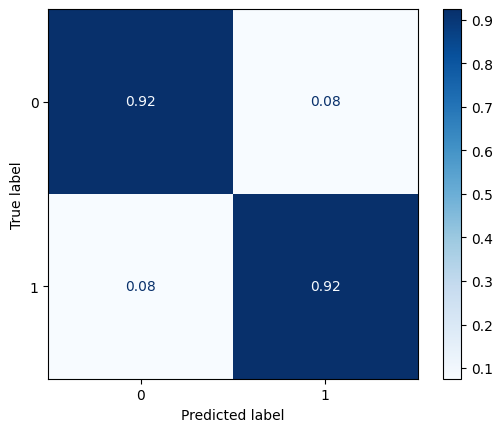

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     58485
           1       0.89      0.89      0.89     58484

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969





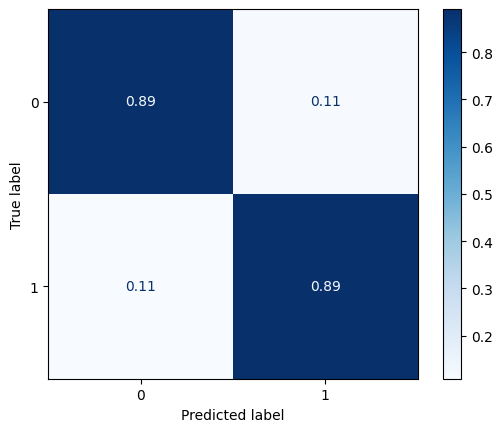

C:\Users\samyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     58485
           1       0.94      0.88      0.91     58484

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969





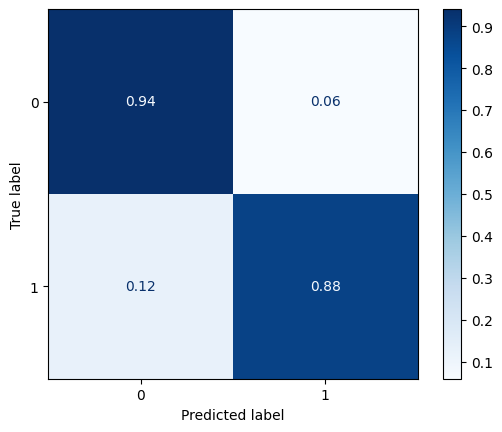

C:\Users\samyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     58485
           1       0.80      0.85      0.82     58484

    accuracy                           0.82    116969
   macro avg       0.82      0.82      0.82    116969
weighted avg       0.82      0.82      0.82    116969





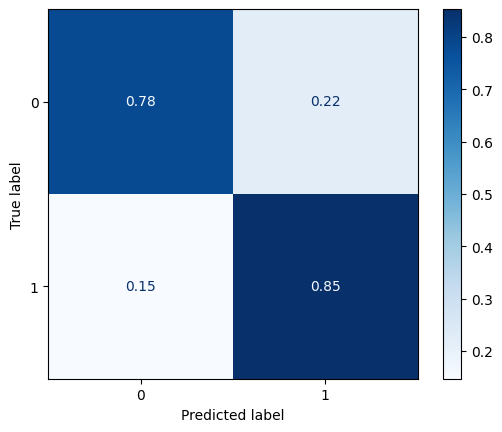

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.763083   0.752519  0.783992  0.767933  0.838970
Random Forest        0.923253   0.922148  0.924561  0.923353  0.971418
Decision Tree        0.888782   0.887067  0.890996  0.889027  0.889488
XGBoost              0.909284   0.936997  0.877573  0.906312  0.970862
MLP Classifier       0.817003   0.795747  0.852934  0.823349  0.902173


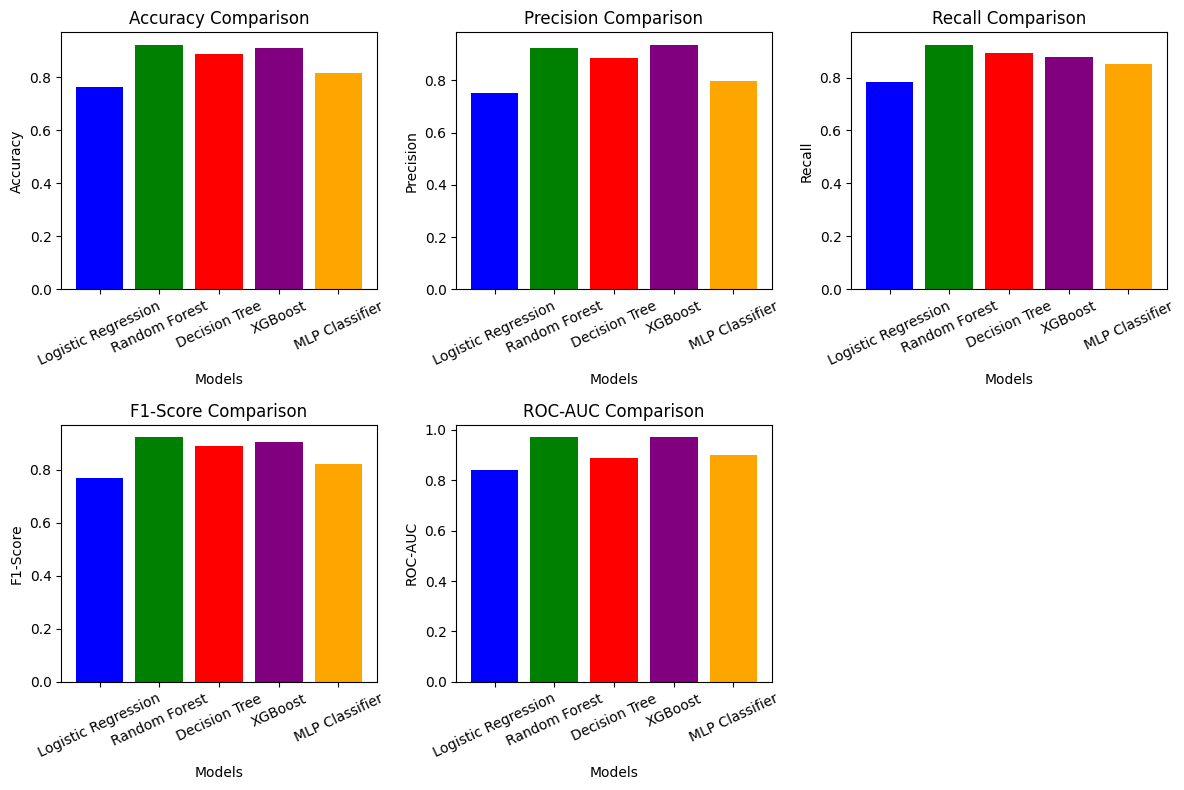

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = [accuracy, precision, recall, f1, roc_auc]

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   PhysicalActivity  319795 non-null  int64  
 10  SleepTime         319795 non-null  float64
 11  Asthma            319795 non-null  int64  
 12  KidneyDisease     319795 non-null  int64  
 13  SkinCancer        319795 non-null  int64  
 14  AgeCategory_0     319795 non-null  float64
 15  AgeCategory_1     319795 non-null  float64
 16  AgeCategory_2     31

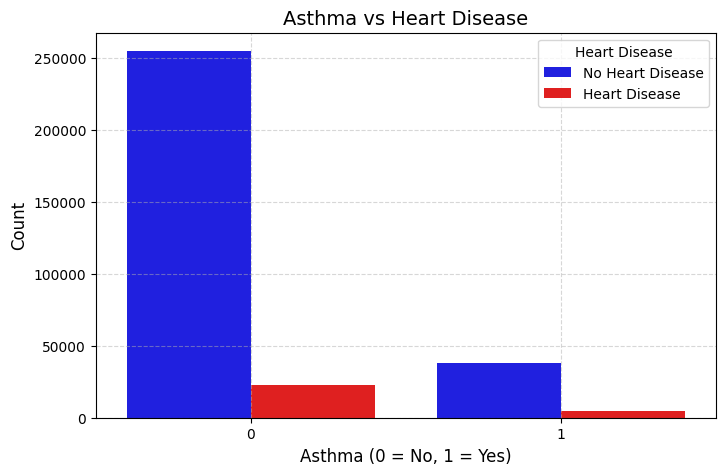

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Countplot
sns.countplot(x='Asthma', hue='HeartDisease', data=df, palette={0: "blue", 1: "red"})

plt.title("Asthma vs Heart Disease", fontsize=14)
plt.xlabel("Asthma (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Disease", labels=["No Heart Disease", "Heart Disease"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


C:\Users\samyu\AppData\Local\Temp\ipykernel_11956\3536799711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='Smoking', data=df, palette="Set2", inner="quartile")


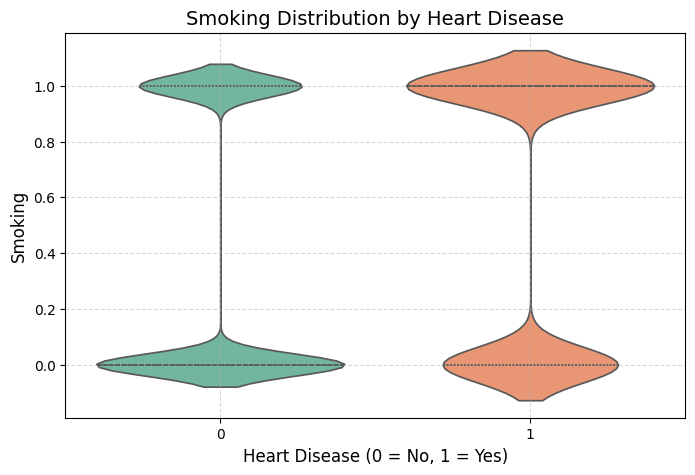

In [21]:
plt.figure(figsize=(8, 5))

sns.violinplot(x='HeartDisease', y='Smoking', data=df, palette="Set2", inner="quartile")

plt.title("Smoking Distribution by Heart Disease", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Smoking", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

C:\Users\samyu\AppData\Local\Temp\ipykernel_11956\3537271349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_categories, y=heart_disease_by_age, palette="rocket")


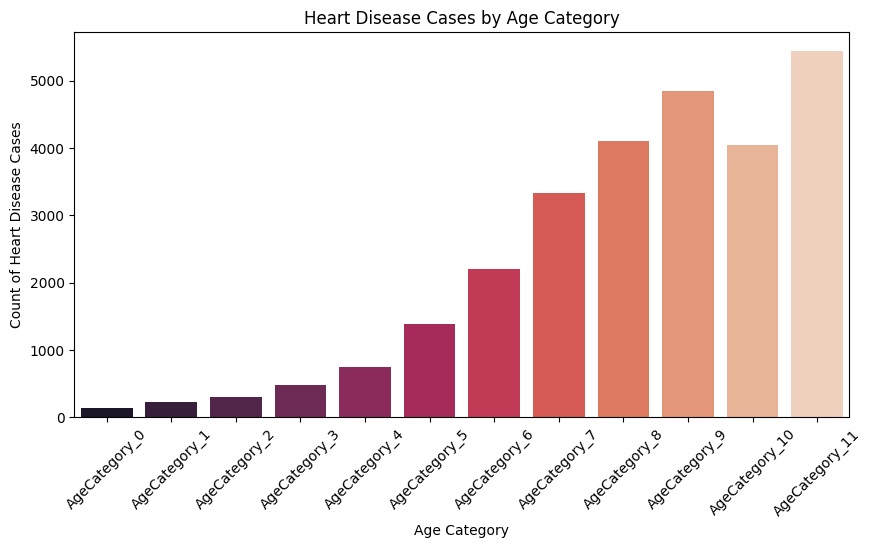

In [24]:
import numpy as np

age_categories = [f'AgeCategory_{i}' for i in range(12)]
heart_disease_by_age = df[df['HeartDisease'] == 1][age_categories].sum()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=age_categories, y=heart_disease_by_age, palette="rocket")
plt.xticks(rotation=45)
plt.title("Heart Disease Cases by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count of Heart Disease Cases")
plt.show()
